# Setup PiCamera access via cv2

Your system should be able to access the PiCamera OV5467 via cv2. Run the following code to test whether it is properly setup. If the following code returns an error, follow the procedure below to fix the PiCamera access.

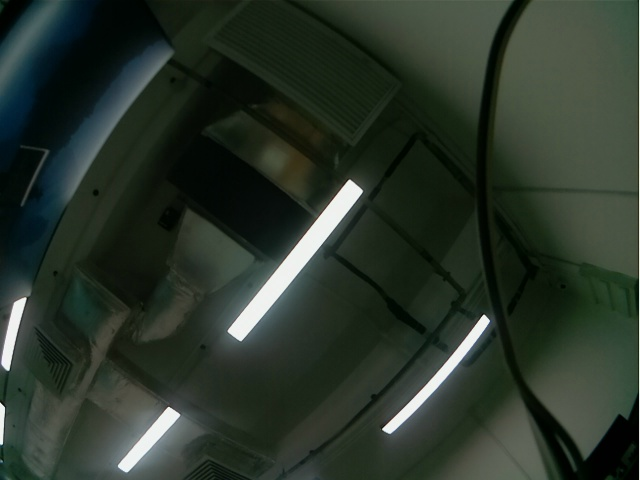

In [17]:
import cv2
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Capture a single frame
ret, frame = cap.read()

# Save the captured image
if ret:
    flipped_frame = cv2.flip(frame, 0)    
    display(Image(data=cv2.imencode('.jpeg', flipped_frame)[1].tobytes()))
else:
    print("Cannot capture frame")

# Release the camera
cap.release()

## Steps to enable PiCamera access via cv2

1. Install OpenCV
2. Check camera is correctly connected
3. Enable legacy camera access
4. Config /boot/config.txt


In [ ]:
### Install OpenCV

In [ ]:
pip install opencv-python

### Check camera is correctly connected

In [19]:
!vcgencmd get_camera

supported=1 detected=1, libcamera interfaces=0


The command above should return `supported=1 detected=1, libcamera interfaces=0`

In [18]:
!v4l2-ctl --list-devices

bcm2835-codec-decode (platform:bcm2835-codec):
	/dev/video10
	/dev/video11
	/dev/video12
	/dev/video18
	/dev/video31
	/dev/media3

bcm2835-isp (platform:bcm2835-isp):
	/dev/video13
	/dev/video14
	/dev/video15
	/dev/video16
	/dev/video20
	/dev/video21
	/dev/video22
	/dev/video23
	/dev/media1
	/dev/media2

mmal service 16.1 (platform:bcm2835_v4l2-0):
	/dev/video0

rpivid (platform:rpivid):
	/dev/video19
	/dev/media0



The command above should return
```
mmal service 16.1 (platform:bcm2835_v4l2-0):
	/dev/video0
```

### 2. Enable legacy camera access (Bulleye Only)

#### Enable Camera in `raspi-config`
1. Execute `sudo raspi-config`
2. Navigate to Interface Options > Legacy Camera
3. Enable it.
4. Reboot your Raspberry Pi.

### 3. Config /boot/config.txt

#### Boot Config Path

Make sure the line `dtoverlay=vc4-kms-v3d` exists in /boot/config.txt.
1. Run the following command to append this parameter to /boot/config.txt
2. Reboot

In [16]:
%%bash

# Bulleye
BOOT_CONFIG_PATH=/boot/firmware/config.txt

# Bookworm
BOOT_CONFIG_PATH=/boot/firmware/config.txt

echo $BOOT_CONFIG_PATH

echo "dtoverlay=vc4-kms-v3d" | sudo tee -a $BOOT_CONFIG_PATH
echo "start_x=1" | sudo tee -a $BOOT_CONFIG_PATH
echo "gpu_mem=128" | sudo tee -a $BOOT_CONFIG_PATH

cat $BOOT_CONFIG_PATH

/boot/firmware/config.txt
dtoverlay=vc4-kms-v3d
start_x=1
gpu_mem=128
# For more options and information see
# http://rptl.io/configtxt
# Some settings may impact device functionality. See link above for details

# Uncomment some or all of these to enable the optional hardware interfaces
dtparam=i2c_arm=on
#dtparam=i2s=on
#dtparam=spi=on

# Enable audio (loads snd_bcm2835)
dtparam=audio=on

# Additional overlays and parameters are documented
# /boot/firmware/overlays/README

# Automatically load overlays for detected DSI displays
display_auto_detect=1

# Automatically load initramfs files, if found
auto_initramfs=1

# Enable DRM VC4 V3D driver
dtoverlay=vc4-kms-v3d
max_framebuffers=2

# Don't have the firmware create an initial video= setting in cmdline.txt.
# Use the kernel's default instead.
disable_fw_kms_setup=1

# Run in 64-bit mode
arm_64bit=1

# Disable compensation for displays with overscan
disable_overscan=1

# Run as fast as firmware / board allows
arm_boost=1

[cm4]
# Enabl

By setting camera_auto_detect to 0:
1. libcamera-hello won't work
2. cv2 in python will work

In [ ]:
!echo "camera_auto_detect=0" | sudo tee -a /boot/firmware/config.txt

In [ ]:
# Reboot
!sudo reboot